#Golden Cross Plus

    1. The SPY closes above its upper band or sma50>sma200, buy
    2. If the SPY closes below its lower band and sma50<sma200, sell your long position.
    
    (optimize period)

In [1]:
%matplotlib inline

Use future imports for python 3.0 forward compatibility

In [2]:
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

Other imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# set size of inline plots
matplotlib.rcParams['figure.figsize'] = [14, 10]

Some global data

In [4]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#end = datetime.datetime(2005, 12, 1)
end = datetime.datetime.now()

Define the periods

In [5]:
periods = range(50, 525, 25)
periods = [str(period) for period in periods]

Run Strategy

In [6]:
strategies = pd.Series()
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, sma_period=int(period))
    strategies[period].run()
    strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].stats()

50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 

Summarize results

In [7]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, *metrics)
df

,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500
annual_return_rate,9.24,8.96,8.42,8.25,8.33,8.24,8.08,8.28,8.18,8.03,8.03,7.99,7.99,8.14,7.93,7.51,7.43,7.49,7.25
max_closed_out_drawdown,-33.23,-33.24,-38.19,-33.24,-33.22,-33.22,-33.22,-33.21,-33.22,-33.21,-33.23,-33.22,-33.22,-33.21,-33.21,-33.20,-36.09,-35.07,-35.05
drawdown_annualized_return,-3.60,-3.71,-4.53,-4.03,-3.99,-4.03,-4.11,-4.01,-4.06,-4.14,-4.14,-4.16,-4.16,-4.08,-4.19,-4.42,-4.86,-4.68,-4.83
drawdown_recovery,-0.15,-0.15,-3.06,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.99,-0.99,-0.99
best_month,15.18,15.18,15.19,14.94,14.94,14.93,14.93,14.94,14.93,14.94,14.94,14.93,14.93,14.93,15.87,15.89,18.17,18.18,18.17
worst_month,-29.56,-29.56,-29.55,-29.56,-29.55,-29.54,-29.54,-29.54,-29.55,-29.53,-29.55,-29.55,-29.54,-29.53,-29.54,-29.53,-29.53,-29.55,-29.52
sharpe_ratio,0.78,0.77,0.74,0.73,0.75,0.75,0.74,0.75,0.75,0.73,0.73,0.73,0.72,0.73,0.71,0.68,0.67,0.67,0.65
sortino_ratio,0.91,0.90,0.84,0.83,0.84,0.83,0.81,0.83,0.83,0.81,0.81,0.81,0.81,0.82,0.80,0.77,0.76,0.76,0.74
monthly_std,3.36,3.29,3.26,3.23,3.17,3.13,3.10,3.10,3.10,3.10,3.12,3.13,3.14,3.16,3.17,3.20,3.25,3.27,3.29
pct_time_in_market,85.40,83.12,80.99,79.39,78.02,77.01,76.62,76.51,76.56,76.76,76.99,77.32,77.70,78.20,78.81,79.42,80.05,80.69,81.43


Bar graphs

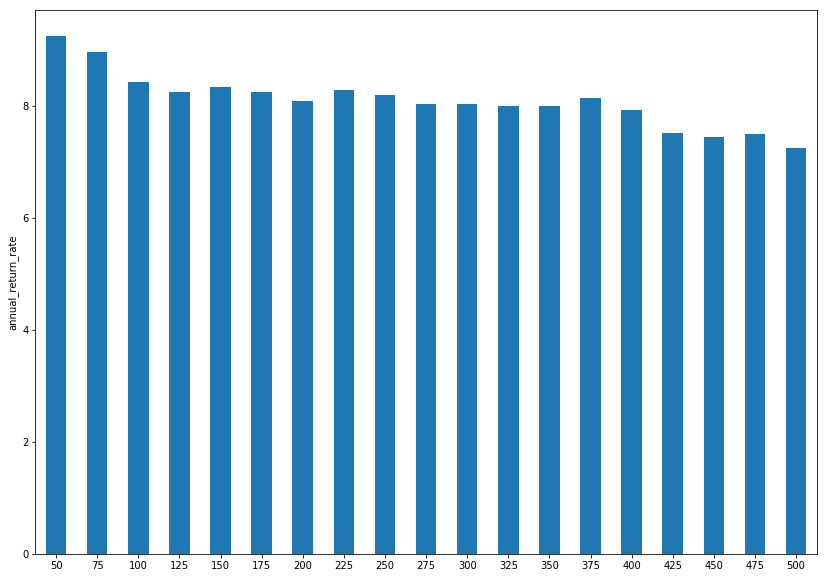

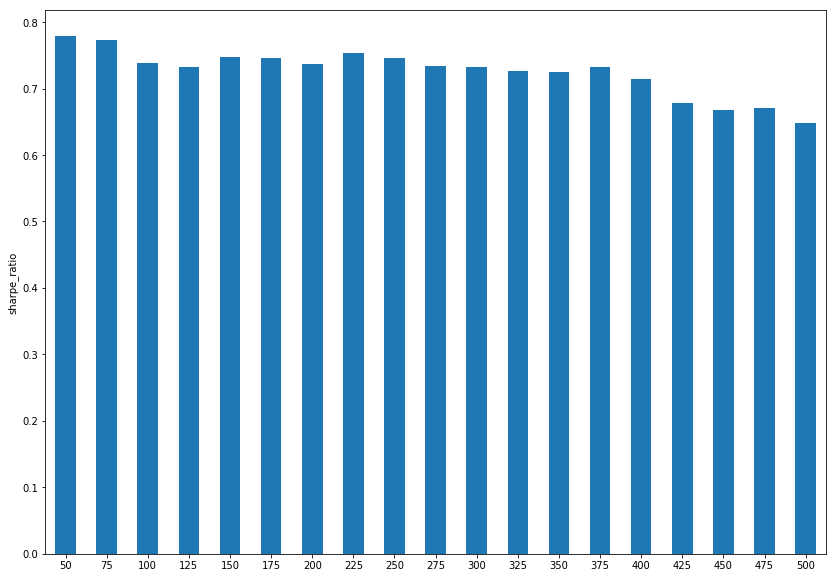

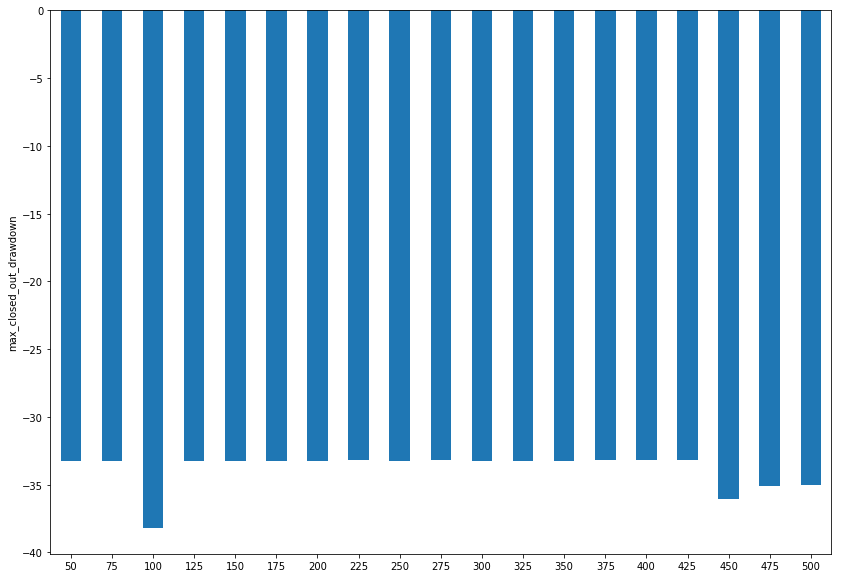

In [8]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [9]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.stats()

1950-03-15 00:00:00 BUY  573 ^GSPC @ 17.45
2019-05-15 00:00:00 SELL 573 ^GSPC @ 2850.96


Equity curve

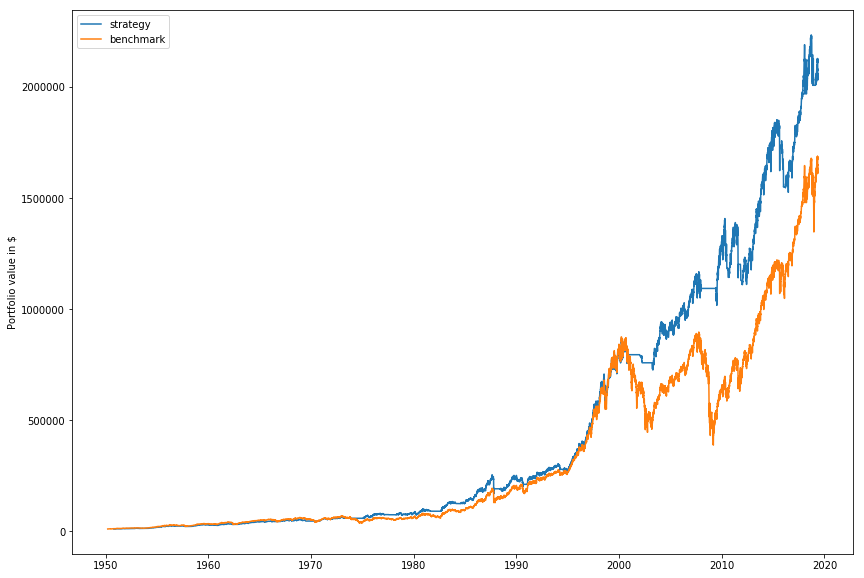

In [10]:
pf.plot_equity_curve(strategies['200'].dbal, benchmark=benchmark.dbal)